# Make an Excel Ray file for Beam4


- Geometry : Auxiliary Telescope Geometry of Optical for CTIO 0.9 m 

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- date : January 14th 2017
- update : February 28th 2017


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel to obtained a


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [172]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


## Output filename and desired wavelength

In [173]:
root_filename="Beam4_Rayfile_"

In [174]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y

In [175]:
Wavelength=0.0004
WL=int(100000.*Wavelength)

In [176]:
theta_x=1  # angle in arcmin
theta_y=1.  # angle in arcmin 

In [177]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [178]:
Beam4_Rayfile="Beam4_Rayfile_{:2d}_{:3d}nm_{:d}_{:d}.xlsx".format(NBEAM,WL,theta_x_num,theta_y_num)

In [179]:
Beam4_Rayfile

'Beam4_Rayfile_121_ 40nm_10_10.xlsx'

## Constants for conversions

In [180]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [181]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [182]:
deg_to_rad=np.pi/180.

In [183]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_ro_rad=1./rad_to_arcmin

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [184]:
Tel_Focal_Length=12.6 # m : Focal length of the telescope
Tel_Diameter=0.9 # m : Diameter of the telescope    

In [185]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

#### Filter

In [186]:
Filt_D=0.05769 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

In [187]:
Filt_size

76.19999999999999

#### CCD Detector

In [188]:
Det_xpic=24.0 # microns per pixel
Det_NbPix=2048 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*1e-3 # CCD size in mm, 5 cm or 2 inches

In [189]:
Det_size

49.152

In [190]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [191]:
print "pixel viewing angle in arcsec = ", Det_pix_angl*rad_to_deg*arcdeg_to_arcsec

pixel viewing angle in arcsec =  0.392885345233


## Location of the source in the field of view

The Field of view of the delescope is 13.6 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [192]:
theta_max=13.6/2.
theta_max=-13.6/2.

In [193]:
alpha_x=theta_x*arcmin_ro_rad
alpha_y=theta_y*arcmin_ro_rad

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective conveging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

In [194]:
D0=Filt_D*m_to_mm  # distance between plane where the trcking beam start

In [195]:
Z0=Tel_Focal_Length*m_to_mm

In [196]:
Z1=Z0-2.*D0  # please set where you want to start the beam

In [197]:
XMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
XMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

In [198]:
YMIN=-Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))
YMAX=Tel_Diameter*m_to_mm/(2.*np.sqrt(2.))

# Number of points

In [199]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

In [200]:
pts = itertools.product(X, Y)

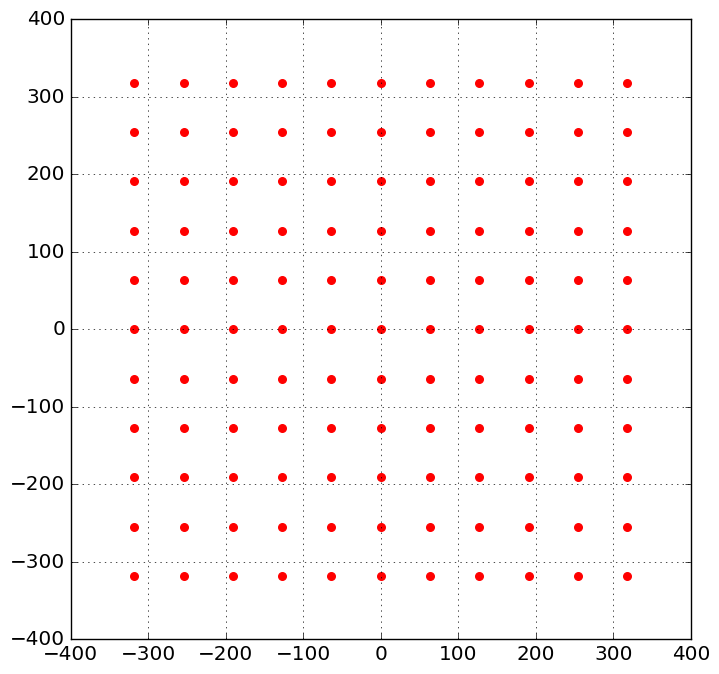

In [201]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')

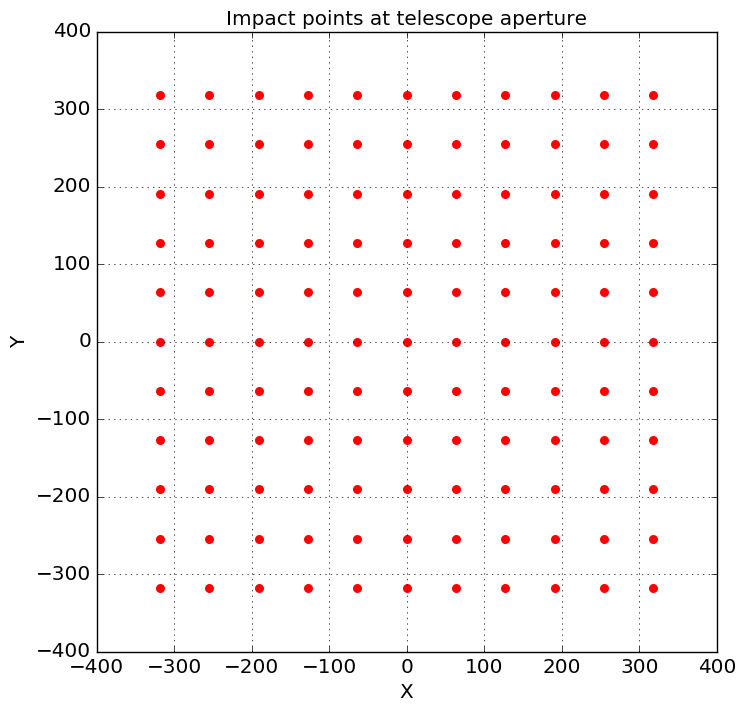

In [202]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Impact points at telescope aperture")

In [203]:
def GetCosinusDirector(X,Y,thealpha_x,thealpha_y,f):
    """
    The size of X,Y is the number of Rays
    """
    
    
    Norm=np.sqrt( np.power(X+f*np.tan(thealpha_x),2) + np.power(Y+f*np.tan(thealpha_y),2)+ f**2)
    UX=-(X+f*np.tan(thealpha_x))/Norm
    UY=-(Y+f*np.tan(thealpha_y))/Norm
    UZ=f/Norm
    return UX,UY,UZ    
    

In [204]:
UX,UY,UZ=GetCosinusDirector(XX,YY,alpha_x,alpha_y,Z0)

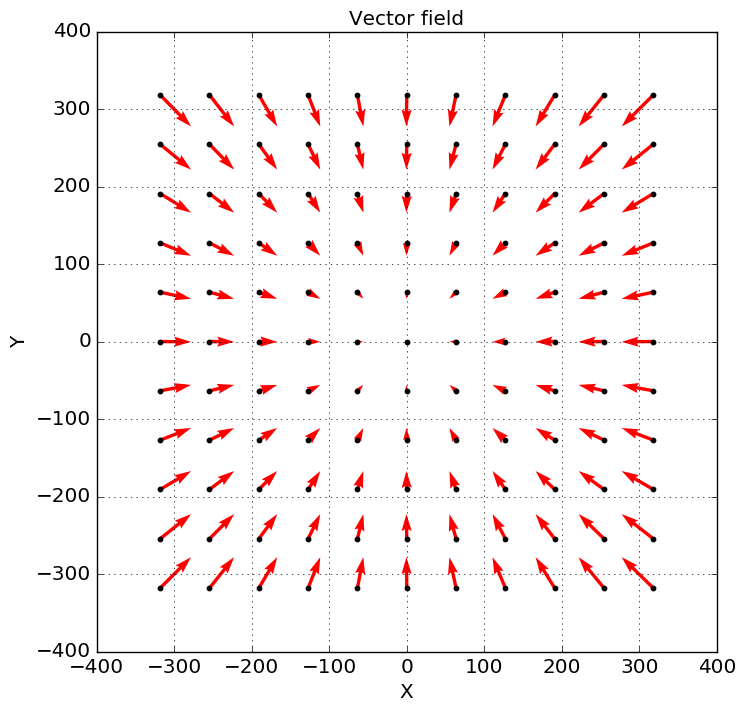

In [205]:

plt.grid()
q = plt.quiver(XX,YY,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX,YY, marker='o', s=10, color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vector field")

In [206]:
def GetStartingPoint(X,Y,thealpha_x,the_alpha_y,f,Z0):
    theX0=(1-Z0/f)*X-Z0*np.tan(alpha_x)
    theY0=(1-Z0/f)*Y-Z0*np.tan(alpha_y)
    return theX0,theY0
    

In [207]:
(X0,Y0)=GetStartingPoint(XX,YY,alpha_x,alpha_y,Z0,Z1)

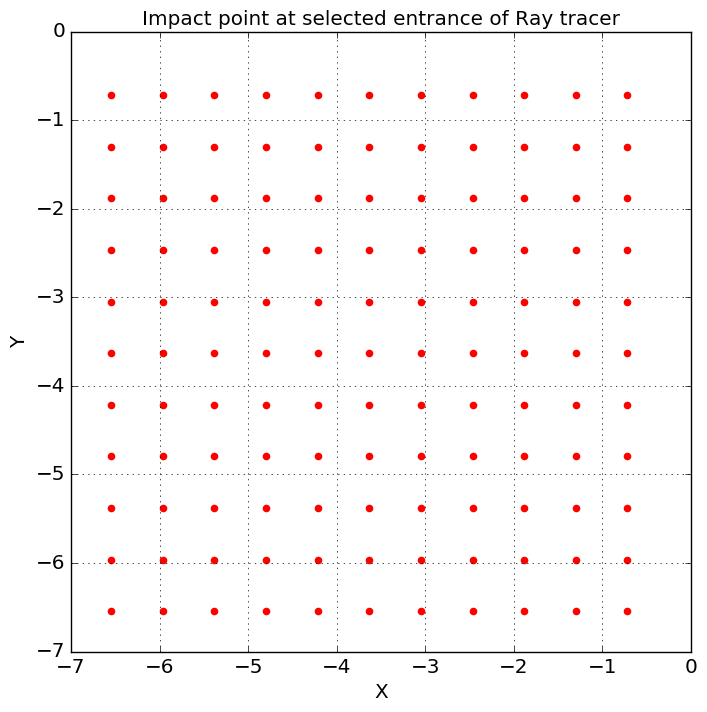

In [208]:
plt.scatter(X0,Y0, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Impact point at selected entrance of Ray tracer")

## Create Dataframe

In [209]:
df = pd.DataFrame()

In [210]:
Xout=X0.flatten()
Yout=Y0.flatten()

In [211]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [212]:
Zout=np.zeros(NBEAM)

In [213]:
Wave=Wavelength*np.ones(NBEAM)

In [214]:
df["X0"]=Xout
df["Y0"]=Yout
df["Z0"]=Zout
df["U0"]=Uout
df["V0"]=Vout
df["W0"]=Wout
df["wave"]=Wave

In [215]:
df

,X0,Y0,Z0,U0,V0,W0,wave
0,-6.545414,-6.545414,0.0,0.024947,0.024947,0.999377,0.0004
1,-5.962657,-6.545414,0.0,0.019902,0.024950,0.999491,0.0004
2,-5.379900,-6.545414,0.0,0.014855,0.024952,0.999578,0.0004
3,-4.797143,-6.545414,0.0,0.009807,0.024954,0.999640,0.0004
4,-4.214386,-6.545414,0.0,0.004758,0.024955,0.999677,0.0004
5,-3.631629,-6.545414,0.0,-0.000291,0.024955,0.999689,0.0004
6,-3.048872,-6.545414,0.0,-0.005340,0.024955,0.999674,0.0004
7,-2.466115,-6.545414,0.0,-0.010389,0.024954,0.999635,0.0004
8,-1.883358,-6.545414,0.0,-0.015437,0.024952,0.999569,0.0004
9,-1.300601,-6.545414,0.0,-0.020483,0.024950,0.999479,0.0004


In [216]:
df.to_excel(Beam4_Rayfile)

In [217]:
Filt_size

76.19999999999999

In [218]:
2*Filt_D*m_to_mm

115.38